<a href="https://colab.research.google.com/github/sharifabdullahtanzim-max/weatherwise/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [ ]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing

In [ ]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: c643454528a34bb79c79b8f01230e79c.csRUAAsdmq3wOJ6EQnNgONez


## 📦 Setup and Configuration
Import required packages and setup environment.

In [140]:
import requests
import matplotlib.pyplot as plt
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# To fetch weather data
import json
import fetch_my_weather
from dataclasses import is_dataclass, asdict

# To visualise data
import matplotlib.pyplot as plt
from math import prod

# Define menu functions using pyinputplus or ipywidgets here
import pyinputplus as pyip
import time
import os
from IPython.display import clear_output, display
import json

# To process natural language
from typing import Dict, Any, Optional
import re
import datetime as dt

## 🌤️ Weather Data Functions

In [186]:

def _to_dict(obj):
    """Best-effort conversion to JSON-serializable dict."""
    if isinstance(obj, dict):
        return obj
    for attr in ("to_dict", "dict", "model_dump"):
        if hasattr(obj, attr) and callable(getattr(obj, attr)):
            return getattr(obj, attr)()
    if hasattr(obj, "json") and callable(getattr(obj, "json")):
        try:
            return json.loads(obj.json())
        except Exception:
            pass
    if is_dataclass(obj):
        return asdict(obj)
    if isinstance(obj, str):
        try:
            return json.loads(obj)
        except Exception:
            pass
    return {"raw": repr(obj)}

def _trim_days(d, days):
    """Trim common forecast arrays to `days` if present."""
    try:
        if "weather" in d and isinstance(d["weather"], list):
            d["weather"] = d["weather"][:days]
        elif "forecast" in d:
            f = d["forecast"]
            if isinstance(f, list):
                d["forecast"] = f[:days]
            elif isinstance(f, dict):
                if "forecastday" in f and isinstance(f["forecastday"], list):
                    f["forecastday"] = f["forecastday"][:days]
                elif "daily" in f and isinstance(f["daily"], list):
                    f["daily"] = f["daily"][:days]
        elif "daily" in d and isinstance(d["daily"], list):
            d["daily"] = d["daily"][:days]
    except Exception:
        pass
    return d

def _clean_location(loc: str) -> str:
    """Normalize spacing/casing (helps with leading/trailing spaces)."""
    s = str(loc).strip()
    s = " ".join(s.split())
    return s.title() or s

def _format_error_payload(e, data_type="json"):
    """
    Build a clear error message from exceptions raised by the library/HTTP layer.
    Tries to surface status code, URL, and a short preview of the response body.
    """
    status = getattr(e, "status", None) or getattr(e, "status_code", None)
    url = getattr(e, "url", None)
    body = getattr(e, "body", None) or getattr(e, "response", None)
    # If it's a requests-like HTTPError:
    resp = getattr(e, "response", None)
    if hasattr(resp, "status_code"):
        status = status or resp.status_code
    if hasattr(resp, "url"):
        url = url or resp.url
    if hasattr(resp, "text"):
        body = body or resp.text

    parts = []
    if status: parts.append(f"HTTP {status}")
    if url: parts.append(f"URL: {url}")
    msg = str(e).strip()
    if msg:
        parts.append(f"Message: {msg}")
    if body:
        preview = body if isinstance(body, str) else str(body)
        preview = preview.strip().splitlines()
        preview = "\n".join(preview[:3])  # first few lines only
        parts.append(f"Response (start):\n{preview}")

    text = "Fetch failed.\n" + ("\n".join(parts) if parts else "Unknown error.")
    if data_type == "text":
        return text
    return {"error": text}

# -------- main API --------

def get_weather_data(location, forecast_days=None, data_type=None):
    """
    Retrieve weather data via fetch_my_weather with safe defaults and clear errors.

    Defaults:
      - forecast_days: 3 (clamped to 1..5 if out of range or invalid)
      - data_type: "json"
    """
    # defaults
    data_type = (data_type or "json").lower()
    if data_type not in ("json", "text"):
        print("Invalid data type. Defaulting to 'json'.")
        data_type = "json"

    try:
        days = 3 if forecast_days is None else int(forecast_days)
    except Exception:
        days = 3
    if not (1 <= days <= 5):
        days = 3

    loc = _clean_location(location)

    try:
        raw = fetch_my_weather.get_weather(
            location=loc,
            format=data_type,
            view_options=str(days)  # library expects a *string*
        )
    except Exception as e:
        # Return a readable error payload instead of crashing.
        return _format_error_payload(e, data_type=data_type)

    # success path
    if data_type == "json":
        data = _to_dict(raw)
        return _trim_days(data, days)
    return raw  # text output is already human-readable

# -------- optional helper (safe to comment out) --------

def pretty_print_weather(weather_data):
    """Pretty-print JSON weather data (won’t crash on custom objects)."""
    data = _to_dict(weather_data)
    print(json.dumps(data, indent=2, ensure_ascii=False))

#print(get_weather_data(location = "Perth", forecast_days=3, data_type="text"))

## 📊 Visualisation Functions

In [142]:
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """

    # ---- 1) Normalise input into a dict (no external helpers) ----
    d = weather_data
    try:
        if hasattr(weather_data, "json") and callable(weather_data.json):
            d = json.loads(weather_data.json())
        elif hasattr(weather_data, "to_dict") and callable(weather_data.to_dict):
            d = weather_data.to_dict()
        elif hasattr(weather_data, "dict") and callable(weather_data.dict):
            d = weather_data.dict()
        elif hasattr(weather_data, "model_dump") and callable(weather_data.model_dump):
            d = weather_data.model_dump()
        elif isinstance(weather_data, str):
            try:
                d = json.loads(weather_data)
            except Exception:
                d = {"raw": weather_data}
        elif not isinstance(weather_data, dict):
            d = {"raw": repr(weather_data)}
    except Exception:
        d = {"raw": repr(weather_data)}

    # ---- 2) Extract date, tmin, tmax, tavg from common shapes ----
    dates, tmin, tmax, tavg = [], [], [], []

    def _f(x):
        try:
            return float(x)
        except Exception:
            return None

    # Shape A: {"forecast":{"forecastday":[{"date":"...", "day":{"mintemp_c":...,"maxtemp_c":...,"avgtemp_c":...}}, ...]}}
    try:
        f = d.get("forecast", {})
        if isinstance(f, dict) and isinstance(f.get("forecastday"), list) and f["forecastday"]:
            for it in f["forecastday"]:
                day = it.get("day", {}) or {}
                dates.append(str(it.get("date") or it.get("dt") or ""))
                tmin.append(_f(day.get("mintemp_c") or day.get("mintempC")))
                tmax.append(_f(day.get("maxtemp_c") or day.get("maxtempC")))
                tavg.append(_f(day.get("avgtemp_c") or day.get("avgtempC")))
    except Exception:
        pass

    # Shape B: {"forecast":{"daily":[{"date":"...", "temp":{"min":...,"max":...,"day":...}}, ...]}}
    if not dates:
        try:
            f = d.get("forecast", {})
            if isinstance(f, dict) and isinstance(f.get("daily"), list) and f["daily"]:
                for it in f["daily"]:
                    t = it.get("temp", {}) or {}
                    dates.append(str(it.get("date") or it.get("dt") or ""))
                    tmin.append(_f(t.get("min")))
                    tmax.append(_f(t.get("max")))
                    tavg.append(_f(t.get("day") or t.get("avg")))
        except Exception:
            pass

    # Shape C: {"daily":[{"date":"...", "temp":{"min":...,"max":...,"day":...}}, ...]}
    if not dates:
        try:
            if isinstance(d.get("daily"), list) and d["daily"]:
                for it in d["daily"]:
                    t = it.get("temp", {}) or {}
                    dates.append(str(it.get("date") or it.get("dt") or ""))
                    tmin.append(_f(t.get("min")))
                    tmax.append(_f(t.get("max")))
                    tavg.append(_f(t.get("day") or t.get("avg")))
        except Exception:
            pass

    # Shape D: {"weather":[{"date":"...", "mintempC":"..", "maxtempC":"..", "avgtempC":".."}, ...]}
    if not dates:
        try:
            if isinstance(d.get("weather"), list) and d["weather"]:
                for it in d["weather"]:
                    dates.append(str(it.get("date") or ""))
                    tmin.append(_f(it.get("mintempC") or it.get("minC")))
                    tmax.append(_f(it.get("maxtempC") or it.get("maxC")))
                    tavg.append(_f(it.get("avgtempC") or it.get("avgC")))
        except Exception:
            pass

    # Nothing usable -> show a friendly notice rather than erroring
    if not dates:
        fig, ax = plt.subplots(figsize=(6, 2.5))
        ax.axis("off")
        ax.text(0.5, 0.5, "No temperature series available.", ha="center", va="center")
        if output_type == "figure":
            return fig
        plt.show()
        return

    # ---- 3) Build the chart ----
    fig, ax = plt.subplots(figsize=(8, 4.5))

    has_any = False
    if any(v is not None for v in tmax):
        ax.plot(dates, tmax, marker="o", label="Max Temp (°C)")
        has_any = True
    if any(v is not None for v in tmin):
        ax.plot(dates, tmin, marker="o", label="Min Temp (°C)")
        has_any = True
    if any(v is not None for v in tavg):
        ax.plot(dates, tavg, marker="o", linestyle="--", label="Avg Temp (°C)")
        has_any = True

    if not has_any:
        ax.axis("off")
        ax.text(0.5, 0.5, "No numeric temperature values to plot.", ha="center", va="center")
    else:
        ax.set_title("Daily Temperature")
        ax.set_xlabel("Date")
        ax.set_ylabel("Temperature (°C)")
        ax.legend(loc="best")
        ax.grid(True, linestyle=":", linewidth=0.5)
        ax.tick_params(axis="x", rotation=30)

    fig.tight_layout()
    if output_type == 'figure':
        return fig
    import matplotlib.pyplot as _plt  # ensure using same backend for show
    _plt.show()


#create_temperature_visualisation(get_weather_data("Perth", 3, "json"), "display")

In [143]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Percentage-based visualisation: shows the *chance of rain per day (%)*.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """

    # ---- 1) Normalise input into a dict (self-contained; same pattern as before) ----
    d = weather_data
    try:
        if hasattr(weather_data, "json") and callable(weather_data.json):
            d = json.loads(weather_data.json())
        elif hasattr(weather_data, "to_dict") and callable(weather_data.to_dict):
            d = weather_data.to_dict()
        elif hasattr(weather_data, "dict") and callable(weather_data.dict):
            d = weather_data.dict()
        elif hasattr(weather_data, "model_dump") and callable(weather_data.model_dump):
            d = weather_data.model_dump()
        elif isinstance(weather_data, str):
            try:
                d = json.loads(weather_data)
            except Exception:
                d = {"raw": weather_data}
        elif not isinstance(weather_data, dict):
            d = {"raw": repr(weather_data)}
    except Exception:
        d = {"raw": repr(weather_data)}

    def _f(x):
        try:
            return float(x)
        except Exception:
            return None

    dates, chances = [], []

    # ---- 2) Try several common shapes to obtain *daily chance of rain (%)* ----

    # A) WeatherAPI-like: forecast.forecastday[].day.daily_chance_of_rain (0-100)
    try:
        f = d.get("forecast", {})
        if isinstance(f, dict) and isinstance(f.get("forecastday"), list) and f["forecastday"]:
            got_any = False
            for it in f["forecastday"]:
                dates.append(str(it.get("date") or it.get("dt") or ""))
                day = it.get("day", {}) or {}
                p = day.get("daily_chance_of_rain")
                if p is None:
                    p = day.get("chance_of_rain")
                if p is not None:
                    chances.append(min(max(_f(p), 0.0), 100.0))
                    got_any = True
                else:
                    # Fallback: compute from hourly[] if present
                    prob_none = []
                    for h in (it.get("hour") or it.get("hourly") or []):
                        ph = _f((h.get("chance_of_rain") if isinstance(h, dict) else None)
                                or (h.get("chanceofrain") if isinstance(h, dict) else None))
                        if ph is not None:
                            prob_none.append(1.0 - min(max(ph, 0.0), 100.0) / 100.0)
                    if prob_none:
                        chances.append((1.0 - prod(prob_none)) * 100.0)
                        got_any = True
                    else:
                        # Last-resort: if any hourly precip > 0, assume some rain (100%), else 0
                        wet = False
                        for h in (it.get("hour") or it.get("hourly") or []):
                            v = _f((h.get("precip_mm") if isinstance(h, dict) else None)
                                   or (h.get("precipMM") if isinstance(h, dict) else None)
                                   or (h.get("rain") if isinstance(h, dict) else None)
                                   or (h.get("precipitation") if isinstance(h, dict) else None))
                            if v and v > 0:
                                wet = True
                                break
                        chances.append(100.0 if wet else 0.0)
                        got_any = True
            if got_any:
                # proceed with plotted series built above
                pass
            else:
                dates.clear(); chances.clear()
    except Exception:
        dates.clear(); chances.clear()

    # B) OpenWeather-like: forecast.daily[].pop in [0,1]
    if not dates:
        try:
            f = d.get("forecast", {})
            if isinstance(f, dict) and isinstance(f.get("daily"), list) and f["daily"]:
                for it in f["daily"]:
                    dates.append(str(it.get("date") or it.get("dt") or ""))
                    p = _f(it.get("pop"))
                    if p is not None:
                        chances.append(min(max(p, 0.0), 1.0) * 100.0)
                    else:
                        # fallback from hourly
                        prob_none = []
                        for h in (it.get("hour") or it.get("hourly") or []):
                            ph = _f(h.get("pop"))
                            if ph is not None:
                                prob_none.append(1.0 - min(max(ph, 0.0), 1.0))
                        if prob_none:
                            chances.append((1.0 - prod(prob_none)) * 100.0)
                        else:
                            wet = False
                            for h in (it.get("hour") or it.get("hourly") or []):
                                v = _f((h.get("rain") if isinstance(h, dict) else None)
                                       or (h.get("precip_mm") if isinstance(h, dict) else None)
                                       or (h.get("precipMM") if isinstance(h, dict) else None))
                                if v and v > 0:
                                    wet = True
                                    break
                            chances.append(100.0 if wet else 0.0)
        except Exception:
            dates.clear(); chances.clear()

    # C) WWO/WTTR-like: root "weather" with hourly[].chanceofrain (0-100)  ← your payload
    if not dates:
        try:
            if isinstance(d.get("weather"), list) and d["weather"]:
                for it in d["weather"]:
                    dates.append(str(it.get("date") or ""))
                    # Prefer day-level if present (rare)
                    p = _f(it.get("daily_chance_of_rain") or it.get("chance_of_rain"))
                    if p is not None:
                        chances.append(min(max(p, 0.0), 100.0))
                        continue
                    # Combine hourly chances: P(any rain) = 1 - Π (1 - p_i)
                    prob_none = []
                    for h in it.get("hourly", []) or []:
                        ph = _f(h.get("chanceofrain"))
                        if ph is not None:
                            prob_none.append(1.0 - min(max(ph, 0.0), 100.0) / 100.0)
                    if prob_none:
                        chances.append((1.0 - prod(prob_none)) * 100.0)
                    else:
                        # Fallback from hourly precip volumes
                        wet = any((_f(h.get("precipMM")) or 0) > 0 for h in it.get("hourly", []))
                        chances.append(100.0 if wet else 0.0)
        except Exception:
            dates.clear(); chances.clear()

    # ---- 3) Handle empty series gracefully ----
    if not dates:
        fig, ax = plt.subplots(figsize=(6, 2.5))
        ax.axis("off")
        ax.text(0.5, 0.5, "No rain-probability data available.", ha="center", va="center")
        if output_type == "figure":
            return fig
        plt.show()
        return

    # Clamp to [0, 100]
    chances = [min(max((c if c is not None else 0.0), 0.0), 100.0) for c in chances]

    # ---- 4) Plot as percentages ----
    fig, ax = plt.subplots(figsize=(8, 4.5))
    ax.bar(dates, chances)
    ax.set_title("Chance of Rain by Day")
    ax.set_xlabel("Date")
    ax.set_ylabel("Chance of Rain (%)")
    ax.set_ylim(0, 100)
    ax.grid(True, axis="y", linestyle=":", linewidth=0.5)
    ax.tick_params(axis="x", rotation=30)

    # Add value labels on top of bars for clarity
    for x, y in zip(dates, chances):
        ax.text(x, y + 1, f"{y:.0f}%", ha="center", va="bottom")

    fig.tight_layout()
    if output_type == 'figure':
        return fig
    import matplotlib.pyplot as _plt
    _plt.show()

# create_precipitation_visualisation(get_weather_data("Perth", 3, "json"), "display")

## 🤖 Natural Language Processing

In [144]:
def parse_weather_question(question: str, default_location: str = "Perth", debug: bool = False) -> str:
    """
    Parse a natural-language weather question and return an AI-style response.
    Uses your existing helpers:
      - get_weather_data(location, forecast_days, data_type="json") -> dict
      - create_temperature_visualisation(weather_dict, display_mode)
      - create_precipitation_visualisation(weather_dict, display_mode)

    Args:
        question: user prompt string, e.g. "rain visualization in Sydney for 3 days"
        default_location: fallback city if none parsed
        debug: if True, prints internal decisions

    Returns:
        String response suitable for display to the user.
        (For visualisation intents, the plotting function is called and a short message is returned.)
    """

    # ===== Try to use hands-on-ai for NLU, else fall back to simple rules =====
    try:
        from hands_on_ai.nlp.intent import IntentClassifier
        from hands_on_ai.nlp.entities import EntityExtractor
        HAI_AVAILABLE = True
    except Exception:
        HAI_AVAILABLE = False

    # ---------- Helpers ----------
    _TIME_WORDS = {
        "today","tomorrow","tonight","now","this","next","weekend",
        "morning","afternoon","evening",
        "monday","tuesday","wednesday","thursday","friday","saturday","sunday",
        "mon","tue","wed","thu","thur","fri","sat","sun",
    }
    _PREPS = {"in","at","for","to","on","by","from","near","around","over","into"}

    def _strip_trailing_timewords(loc: str) -> str:
        tokens = loc.split()
        while tokens and tokens[-1].lower() in _TIME_WORDS:
            tokens.pop()
        if len(tokens) >= 2 and tokens[-2].lower().isdigit() and tokens[-1].lower() in {"day","days"}:
            tokens = tokens[:-2]
        if tokens and tokens[-1].lower() in _PREPS:
            tokens = tokens[:-1]
        return " ".join(tokens).strip()

    def _normalize_location(text: str) -> Optional[str]:
        # 1) NER path (if available)
        if HAI_AVAILABLE:
            try:
                ee = EntityExtractor(entities=["GPE", "LOC", "CITY"])
                ents = ee.extract(text)
                for e in ents:
                    if e.get("label") in ("GPE","LOC","CITY"):
                        loc = re.sub(r"[^\w\s\-']", "", e.get("text")).strip()
                        loc = _strip_trailing_timewords(loc)
                        if loc:
                            return loc
            except Exception:
                pass

        # 2) Preposition-based capture with strong stop conditions
        cleaned = text.strip()
        time_words_alt = "|".join(sorted(_TIME_WORDS))
        preps_alt = "|".join(sorted(_PREPS))
        preposition_pattern = rf"""
            \b(?:{preps_alt})\s+                      # leading preposition
            (?P<loc>[A-Za-z][A-Za-z\s\-']{{0,60}}?)    # candidate location (reluctant)
            (?=
                \s+(?:{time_words_alt})\b             # time word ahead
              | \s+\d+\s+days?\b                      # "in 2 days", "for 3 days"
              | \s+(?:{preps_alt})\b                  # another preposition
              | [\.,\?!]                              # punctuation
              | $                                     # end of string
            )
        """
        m = re.search(preposition_pattern, cleaned, flags=re.I | re.X)
        if m:
            loc = re.sub(r"[^\w\s\-']", "", m.group("loc")).strip()
            loc = _strip_trailing_timewords(loc)
            if loc:
                return loc

        # 3) Trailing-place heuristic (guard against time words & prepositions)
        tokens = re.findall(r"[A-Za-z][A-Za-z\-']*", cleaned)
        if tokens:
            if tokens[-1].lower() not in _TIME_WORDS and tokens[-1].lower() not in _PREPS:
                for k in range(4, 0, -1):
                    cand = " ".join(tokens[-k:])
                    cand = re.sub(r"[^\w\s\-']", "", cand).strip()
                    cand = _strip_trailing_timewords(cand)
                    if cand and cand.split()[-1].lower() not in _PREPS and cand.lower() not in _TIME_WORDS:
                        return cand
        return None

    def _pick_day_offset(user_text: str) -> int:
        t = user_text.lower()
        if any(k in t for k in ["tomorrow", "tmrw", "tomo"]):
            return 1
        if "day after" in t or "in 2 days" in t:
            return 2
        return 0

    def _pick_forecast_days(user_text: str, fallback_days: int = 3) -> int:
        t = user_text.lower()
        m = re.search(r"\b(?:for|next)\s*(\d{1,2})\s*day", t)
        if m:
            try:
                val = int(m.group(1))
                return max(1, min(5, val))
            except Exception:
                pass
        return max(1, min(5, fallback_days))

    # ---------- Intent Resolution ----------
    class SimpleIntent:
        CURRENT_TEMP = "current_temp"
        CURRENT_CONDITION = "current_condition"
        HUMIDITY = "humidity"
        WIND = "wind"
        FORECAST_SUMMARY = "forecast_summary"
        TEMP_VIS = "temperature_visualisation"
        PRECIP_VIS = "precipitation_visualisation"
        UNKNOWN = "unknown"

    def _classify_intent(user_text: str) -> str:
        # 1) Try hands_on_ai first
        if HAI_AVAILABLE:
            try:
                clf = IntentClassifier(
                    labels=[
                        SimpleIntent.CURRENT_TEMP,
                        SimpleIntent.CURRENT_CONDITION,
                        SimpleIntent.HUMIDITY,
                        SimpleIntent.WIND,
                        SimpleIntent.FORECAST_SUMMARY,
                        SimpleIntent.TEMP_VIS,
                        SimpleIntent.PRECIP_VIS,
                    ],
                    seed_examples={
                        SimpleIntent.CURRENT_TEMP: [
                            "what is the current temperature?",
                            "temp now?",
                            "how hot is it right now?",
                        ],
                        SimpleIntent.CURRENT_CONDITION: [
                            "what's the weather like now?",
                            "is it raining now?",
                            "current weather condition?",
                        ],
                        SimpleIntent.HUMIDITY: ["humidity now?", "what is the humidity?"],
                        SimpleIntent.WIND: ["wind speed now?", "how windy is it?"],
                        SimpleIntent.FORECAST_SUMMARY: [
                            "what's the forecast today?",
                            "weather tomorrow?",
                            "forecast for sunday",
                            "will it rain this weekend?",
                        ],
                        SimpleIntent.TEMP_VIS: [
                            "show temperature visualization",
                            "visualize temperature",
                            "visualise temperature",
                            "temperature chart",
                            "plot temperatures next 3 days",
                            "temperature graph",
                        ],
                        SimpleIntent.PRECIP_VIS: [
                            "show precipitation visualization",
                            "visualize pericipitaion",
                            "visualise pericipitaion",
                            "rain visualization",
                            "rainfall graph",
                            "precip chart",
                        ],
                    },
                )
                pred = clf.predict(user_text)
                return pred.get("label", SimpleIntent.UNKNOWN)
            except Exception:
                pass

        # 2) Fallback keyword/regex matcher with typo tolerance
        t = user_text.lower()
        def has_any(tokens): return any(tok in t for tok in tokens)
        vis_words = ["visualization", "visualisation", "chart", "plot", "graph", "viz"]
        precip_tokens = [
            "precip", "precipitation", "rain", "rainfall",
            "percip", "percipi", "percipitation", "pericipitation", "pericipitaion"
        ]
        if (has_any(precip_tokens) and has_any(vis_words)) or "rain viz" in t:
            return SimpleIntent.PRECIP_VIS
        if (("temperature" in t or "temp" in t) and has_any(vis_words)):
            return SimpleIntent.TEMP_VIS
        if any(k in t for k in ["temperature", "temp", "how hot", "how cold"]):
            return SimpleIntent.CURRENT_TEMP
        if any(k in t for k in ["condition", "weather like", "raining", "rain now", "sunny now"]):
            return SimpleIntent.CURRENT_CONDITION
        if "humidity" in t:
            return SimpleIntent.HUMIDITY
        if any(k in t for k in ["wind", "windy"]):
            return SimpleIntent.WIND
        if "forecast" in t or any(k in t for k in ["today", "tomorrow", "weekend"]):
            return SimpleIntent.FORECAST_SUMMARY
        return SimpleIntent.UNKNOWN

    # ---------- Main flow ----------
    user_text = question or ""
    location = _normalize_location(user_text) or default_location
    intent = _classify_intent(user_text)
    day_offset = _pick_day_offset(user_text)
    days_hint = _pick_forecast_days(user_text, fallback_days=3)

    # Decide days to fetch
    if intent in (SimpleIntent.TEMP_VIS, SimpleIntent.PRECIP_VIS):
        forecast_days = days_hint
    else:
        forecast_days = max(1, min(5, max(day_offset + 1, days_hint)))

    if debug:
        print(f"Intent: {intent} | Location: {location} | days: {forecast_days}")

    # Fetch data via user's function
    try:
        data = get_weather_data(location=location, forecast_days=forecast_days, data_type="json")
        if not isinstance(data, dict) or not data:
            msg = f"Sorry, I couldn't parse weather data for {location}."
            if location == default_location:
                msg += " (Used default location.)"
            return msg
    except Exception as e:
        msg = f"Sorry, I couldn't fetch weather for {location}. ({type(e).__name__}: {e})"
        if location == default_location:
            msg += " (Used default location.)"
        return msg

    # Visualisation intents
    if intent == SimpleIntent.TEMP_VIS:
        try:
            if debug: print("Calling create_temperature_visualisation(...)")
            create_temperature_visualisation(data, "display")
            return f"Temperature visualisation for {location} (next {forecast_days} day(s)) is shown."
        except NameError:
            return ("Temperature visualisation function not found. "
                    "Ensure create_temperature_visualisation(weather_dict, display_mode) is defined/imported.")
        except Exception as e:
            return f"Couldn't create temperature visualisation: {type(e).__name__}: {e}"

    if intent == SimpleIntent.PRECIP_VIS:
        try:
            if debug: print("Calling create_precipitation_visualisation(...)")
            create_precipitation_visualisation(data, "display")
            return f"Precipitation visualisation for {location} (next {forecast_days} day(s)) is shown."
        except NameError:
            return ("Precipitation visualisation function not found. "
                    "Ensure create_precipitation_visualisation(weather_dict, display_mode) is defined/imported.")
        except Exception as e:
            return f"Couldn't create precipitation visualisation: {type(e).__name__}: {e}"

    # Q&A intents
    current = None
    forecast = None
    try:
        if "current_condition" in data and data["current_condition"]:
            current = data["current_condition"][0]
        if "weather" in data and data["weather"]:
            forecast = data["weather"]
    except Exception:
        pass

    def get_forecast_day(idx: int) -> Optional[Dict[str, Any]]:
        if not forecast:
            return None
        if idx < len(forecast):
            return forecast[idx]
        return None

    if intent == SimpleIntent.CURRENT_TEMP:
        if current and ("temp_C" in current or "FeelsLikeC" in current):
            temp_c = current.get("temp_C") or current.get("FeelsLikeC")
            return f"Current temperature in {location}: {temp_c}°C"
        return f"Sorry, I couldn't find the current temperature for {location}."

    if intent == SimpleIntent.CURRENT_CONDITION:
        if current:
            desc = None
            if "weatherDesc" in current and current["weatherDesc"]:
                desc = current["weatherDesc"][0].get("value")
            elif "weatherCode" in current:
                desc = f"code {current['weatherCode']}"
            return f"Current condition in {location}: {desc or 'unavailable'}"
        return f"Sorry, I couldn't find the current condition for {location}."

    if intent == SimpleIntent.HUMIDITY:
        if current and "humidity" in current:
            return f"Humidity in {location}: {current['humidity']}%"
        return f"Sorry, humidity data isn't available for {location}."

    if intent == SimpleIntent.WIND:
        if current and ("windspeedKmph" in current or "windspeedMiles" in current):
            kmh = current.get("windspeedKmph")
            mph = current.get("windspeedMiles")
            dirp = current.get("winddir16Point")
            if kmh:
                return f"Wind in {location}: {kmh} km/h{f' {dirp}' if dirp else ''}"
            if mph:
                return f"Wind in {location}: {mph} mph{f' {dirp}' if dirp else ''}"
        return f"Sorry, wind data isn't available for {location}."

    if intent == SimpleIntent.FORECAST_SUMMARY:
        day = get_forecast_day(day_offset)
        if not day:
            return f"Sorry, I couldn't find the forecast for {location}."

        date = day.get("date")
        maxt = day.get("maxtempC") or day.get("maxtempF")
        mint = day.get("mintempC") or day.get("mintempF")
        precip = day.get("totalPrecipMM") or day.get("totalprecipMM") or day.get("precipMM")
        chance = None

        if "hourly" in day and isinstance(day["hourly"], list):
            chances = []
            for h in day["hourly"]:
                for key in ("chanceofrain", "chanceofprecip"):
                    if key in h and str(h[key]).isdigit():
                        chances.append(int(h[key]))
            if chances:
                chance = max(chances)

        label = "today" if day_offset == 0 else ("tomorrow" if day_offset == 1 else f"in {day_offset} days")

        parts = []
        if date:
            try:
                dt_label = dt.datetime.strptime(date, "%Y-%m-%d").strftime("%a %d %b")
            except Exception:
                dt_label = date
            parts.append(f"{dt_label} ({label})")
        else:
            parts.append(label)

        if maxt and mint:
            parts.append(f"High {maxt}°C / Low {mint}°C")
        elif maxt:
            parts.append(f"Max {maxt}°C")
        if precip:
            parts.append(f"Precip ~{precip} mm")
        if chance is not None:
            parts.append(f"Rain chance ~{chance}%")

        return f"Forecast for {location} — " + ", ".join(parts)

    # Default help
    return ("I can help with temperature, condition, humidity, wind, daily forecasts, "
            "and temperature/precipitation visualisations. "
            "Try: 'rain visualization in Sydney for 3 days' or 'temperature chart for Perth'.")



## 🧭 User Interface

In [148]:

# ==============================================================================
# User Interface
# ==============================================================================

def manual_mode():
    """
    FIXED: Handles the Manual Mode menu and input.
    Added time.sleep after clear_output and wrapped core logic in try-except
    for robust input handling in Colab.
    """
    # clear_output(wait=True)
    print("--- ⚙️ Manual Weather Data Request ---")
    print("You will manually enter the parameters for the weather request.")

    # Crucial addition for Colab/Jupyter environments
    time.sleep(0.5)

    try:
        # 1. Input Location (string)
        location = pyip.inputStr(
            prompt="Enter Location (e.g., Perth, London): ",
            allowRegexes=[r'^[A-Za-z\s]+$'],
            blockRegexes=[r'^\d+$'],
            limit=3,
            timeout=30,
            default="Perth"
        )

        # 2. Input Forecast Days (integer)
        days = pyip.inputInt(
            prompt="Enter Forecast Days (1-3): ",
            min=1,
            max=14,
            limit=3,
            timeout=30,
            default=3
        )

        # 3. Input Data Type (Menu selection)
        data_type_choice = pyip.inputMenu(
            prompt="Select Data/Visualization Type:\n",
            choices=['Basic Weather Data', 'Temperature Visualization', 'Precipitation Visualization'],
            numbered=True,
            limit=3,
            timeout=30
        )

        # 4. Input Fetch Data Type
        dt = pyip.inputStr(
            prompt="Enter Fetch DataType (e.g., json, text): ",
            allowRegexes=[r'^[A-Za-z\s]+$'],
            blockRegexes=[r'^\d+$'],
            limit=3,
            timeout=30,
            default="text"
        )

        # 5. Process Request
        print("\nProcessing request...")
        time.sleep(0.5)

        if data_type_choice == 'Basic Weather Data':
            data = get_weather_data(location, days, dt)
            print(f"\n--- ✅ Basic Weather Data for {location} (Next {days} Days) ---")
            print(data)

        else:
            weather_data = get_weather_data(location, days, dt)

            if data_type_choice == 'Temperature Visualization':
                create_temperature_visualisation(weather_data, "display")

            elif data_type_choice == 'Precipitation Visualization':
                create_precipitation_visualisation(weather_data, "display")

            # 🌟 NEW HALT LOGIC: Pause after the visualization is shown
            print("\n--- Visualization Displayed ---")
            time.sleep(10)
            #clear_output(wait=True)
            time.sleep(1)

    # Graceful handling for input failures
    except pyip.RetryLimitException:
        print("\n❌ Error: Too many invalid attempts or timed out. Failed to get complete input.")
    except pyip.TimeoutException:
        print("\n❌ Error: Input timed out. Failed to get complete input.")
    except Exception as e:
        print(f"\n❌ An unexpected error occurred during manual input or processing: {e}")

    # Pauses before returning to the main menu
    print("\n--- End of Manual Mode ---")
    pyip.inputStr(prompt="Press Enter to return to the Main Menu...", blank=True, limit = 2)
    return

def conversation_mode():
    """Handles the Conversation Mode loop."""
    #clear_output(wait=True)
    print("--- 🗣️ Conversation Mode (AI Agent) ---")
    print("Ask the AI agent for weather information or visualizations.")
    print(" - Type 'EXIT' to return to the Main Menu.")
    print("-" * 40)

    while True:
        try:
            user_input = pyip.inputStr(
                prompt="Your Query > ",
                limit=5,
                timeout=60
            )

            if user_input.upper() == 'EXIT':
                print("\nReturning to Main Menu...")
                time.sleep(1)
                break

            ai_response = parse_weather_question(user_input)
            print("-" * 40)
            print(f"AI Response:\n{ai_response}")
            print("-" * 40)

        except pyip.RetryLimitException:
            print("\n❌ Too many invalid or empty inputs. Returning to Main Menu.")
            break
        except pyip.TimeoutException:
            print("\n❌ Input timed out. Returning to Main Menu.")
            break
        except Exception as e:
            print(f"\n❌ An unexpected error occurred in AI processing: {e}")
            break

## 🧩 Main Application Logic

In [150]:
# Tie everything together here
def generate_weather_response():
    while True:
        # clear_output(wait=True)
        print("=============================================")
        print("            Weather App Main Menu            ")
        print("=============================================")
        print("Please select a mode to proceed:")

        menu_choice = pyip.inputMenu(
            choices=['Manual Mode', 'Conversation Mode', 'Exit App'],
            prompt="Select Mode: \n",
            numbered=True,
            limit=3,
            timeout=60
        )

        if menu_choice == 'Manual Mode':
            manual_mode()
        elif menu_choice == 'Conversation Mode':
            conversation_mode()
        elif menu_choice == 'Exit App':
            clear_output(wait=True)
            print("Thank you for using the Weather App! 👋")
            break
if __name__ == "__main__":
  generate_weather_response()

            Weather App Main Menu            
Please select a mode to proceed:
Select Mode: 
1. Manual Mode
2. Conversation Mode
3. Exit App


KeyboardInterrupt: Interrupted by user

### 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

In [152]:
#1.1 raw data fetch -> multiple location
print(get_weather_data("Perth", 2, "text"))

Weather report: Perth

                Overcast
       .--.     60 °F          
    .-(    ).   → 18 mph       
   (___.__)__)  6 mi           
                0.0 in         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Fri 24 Oct ├───────────────────────┬──────────────────────────────┐
│            Morning           │             Noon      └──────┬──────┘     Evening           │             Night            │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│  _`/"".-.     Patchy rain ne…│  _`/"".-.     Light rain sho…│  _`/"".-.     Patchy rain ne…│  _`/"".-.     Light rain sho…│
│   ,\_(   ).   62 °F          │   ,\_(   ).   62 °F          │   ,\_(   ).   60 °F          │   ,\_(   ).   59 °F          │
│    /(___(__)  → 14-16 mph    │    /(___(__)  → 24-29 mph    │    /

In [153]:
#1.2 raw data fetch -> multiple location
print(get_weather_data("London", 3, "text"))

Weather report: London

   _`/"".-.     Patchy rain nearby
    ,\_(   ).   +53(50) °F     
     /(___(__)  ↗ 14 mph       
       ‘ ‘ ‘ ‘  6 mi           
      ‘ ‘ ‘ ‘   0.0 in         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Fri 24 Oct ├───────────────────────┬──────────────────────────────┐
│            Morning           │             Noon      └──────┬──────┘     Evening           │             Night            │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│    \  /       Partly Cloudy  │  _`/"".-.     Patchy rain ne…│    \  /       Partly Cloudy  │  _`/"".-.     Patchy rain ne…│
│  _ /"".-.     +48(42) °F     │   ,\_(   ).   +53(50) °F     │  _ /"".-.     +50(44) °F     │   ,\_(   ).   +50(44) °F     │
│    \_(   ).   ↗ 11-14 mph    │    /(___(__)  ↗ 14-16 mp

In [154]:
#1.3 raw data fetch -> multiple location
print(get_weather_data("London", 3, "json"))

{'current_condition': [{'FeelsLikeC': '10', 'FeelsLikeF': '50', 'cloudcover': '25', 'humidity': '62', 'localObsDateTime': '2025-10-24 01:15 PM', 'observation_time': '12:15 PM', 'precipInches': '0.0', 'precipMM': '0.1', 'pressure': '1000', 'pressureInches': '30', 'temp_C': '12', 'temp_F': '54', 'uvIndex': '2', 'visibility': '10', 'visibilityMiles': '6', 'weatherCode': '176', 'weatherDesc': [{'value': 'Patchy rain nearby'}], 'weatherIconUrl': [{'value': ''}], 'winddir16Point': 'WSW', 'winddirDegree': '251', 'windspeedKmph': '23', 'windspeedMiles': '14'}], 'nearest_area': [{'areaName': [{'value': 'London'}], 'country': [{'value': 'United Kingdom'}], 'latitude': '51.517', 'longitude': '-0.106', 'population': '7421228', 'region': [{'value': 'City of London Greater London'}], 'weatherUrl': [{'value': ''}]}], 'request': [{'query': 'Lat 51.51 and Lon -0.13', 'type': 'LatLon'}], 'weather': [{'astronomy': [{'moon_illumination': '6', 'moon_phase': 'Waxing Crescent', 'moonrise': '11:17 AM', 'moons

/tmp/ipython-input-2611054096.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  return getattr(obj, attr)()


In [156]:
#2.1 testing with various weather questions
response = parse_weather_question("What's the current temperature in perth?")
print(response)

Current temperature in perth: 16°C


/tmp/ipython-input-2611054096.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  return getattr(obj, attr)()


In [157]:
#2.2 testing with various weather questions
response = parse_weather_question("Hi, what is the current humidity in sydney?")
print(response)

Humidity in sydney: 68%


/tmp/ipython-input-2611054096.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  return getattr(obj, attr)()


/tmp/ipython-input-2611054096.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  return getattr(obj, attr)()


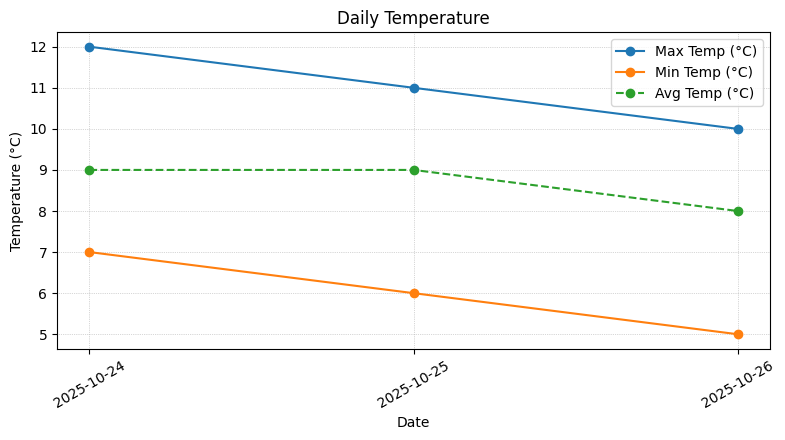

Temperature visualisation for london (next 3 day(s)) is shown.


In [158]:
#2.1 testing with various weather questions
response = parse_weather_question("Hello, show temperature visualization for london for 3 days.")
print(response)

In [185]:
#3.1 testing with edge cases (invalid Location)
print(get_weather_data(location = "Pertthh", forecast_days = 2, data_type="json"))

## There's no internal exection handling mechanishm in fetch_my_weather.get_weather(), that's why when the location is invalid it is directly crashing the program. To make it compatible
# the library function get_weather() needs to be edited.

{'raw': '\'Error fetching data from wttr.in: Status code 404 for URL http://wttr.in/Pertthh?2&format=j1\\nResponse body (start): {\\n    "current_condition": [\\n        {\\n            "FeelsLikeC": "33",\\n            "FeelsLikeF": "92",\\n            "cloudcover": "50",\\n            "humidity": "70",\\n            "localObsDateTime": "20\''}


            Weather App Main Menu            
Please select a mode to proceed:
Select Mode: 
1. Manual Mode
2. Conversation Mode
3. Exit App
1
--- ⚙️ Manual Weather Data Request ---
You will manually enter the parameters for the weather request.
Enter Location (e.g., Perth, London): Perth
Enter Forecast Days (1-3): 3
Select Data/Visualization Type:
1. Basic Weather Data
2. Temperature Visualization
3. Precipitation Visualization
1
Enter Fetch DataType (e.g., json, text): text

Processing request...

--- ✅ Basic Weather Data for Perth (Next 3 Days) ---
Weather report: Perth

       .-.      Light rain shower
      (   ).    +57(53) °F     
     (___(__)   → 18 mph       
      ‘ ‘ ‘ ‘   3 mi           
     ‘ ‘ ‘ ‘    0.0 in         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Fri 24 Oct ├───────────────────────┬──────────────────────────────┐
│    

/tmp/ipython-input-4294784418.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  return getattr(obj, attr)()


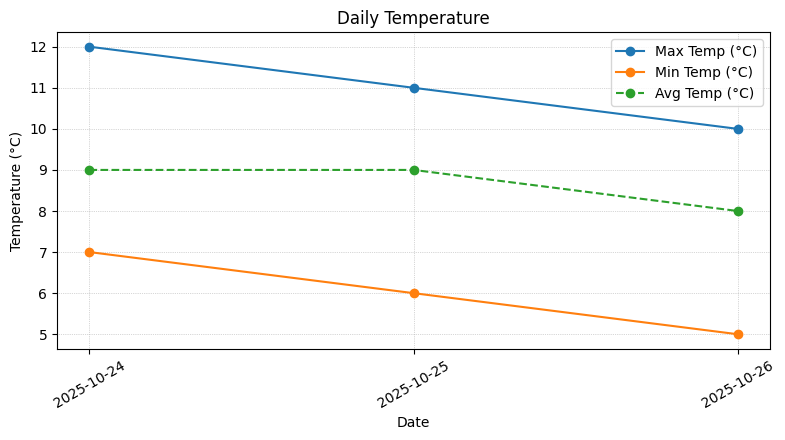


--- Visualization Displayed ---

--- End of Manual Mode ---
Press Enter to return to the Main Menu...
            Weather App Main Menu            
Please select a mode to proceed:
Select Mode: 
1. Manual Mode
2. Conversation Mode
3. Exit App
2
--- 🗣️ Conversation Mode (AI Agent) ---
Ask the AI agent for weather information or visualizations.
 - Type 'EXIT' to return to the Main Menu.
----------------------------------------
Your Query > What's the current temperature in perth?
----------------------------------------
AI Response:
Current temperature in perth: 14°C
----------------------------------------
Your Query > Show weather forecast for sydney
----------------------------------------
AI Response:
Forecast for sydney — Sat 25 Oct (today), High 21°C / Low 15°C, Rain chance ~69%
----------------------------------------
Your Query > Show rain visualization for london for 3 days


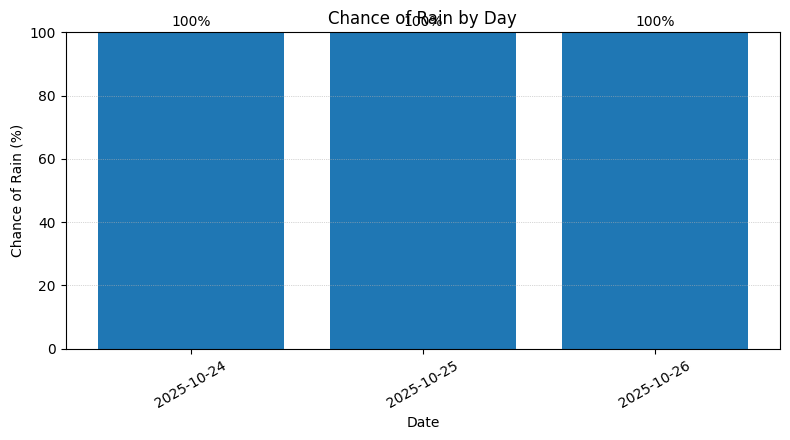

----------------------------------------
AI Response:
Precipitation visualisation for london (next 3 day(s)) is shown.
----------------------------------------
Your Query > Exit

Returning to Main Menu...
            Weather App Main Menu            
Please select a mode to proceed:
Select Mode: 
1. Manual Mode
2. Conversation Mode
3. Exit App


KeyboardInterrupt: Interrupted by user

In [188]:
generate_weather_response()

/tmp/ipython-input-4294784418.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  return getattr(obj, attr)()


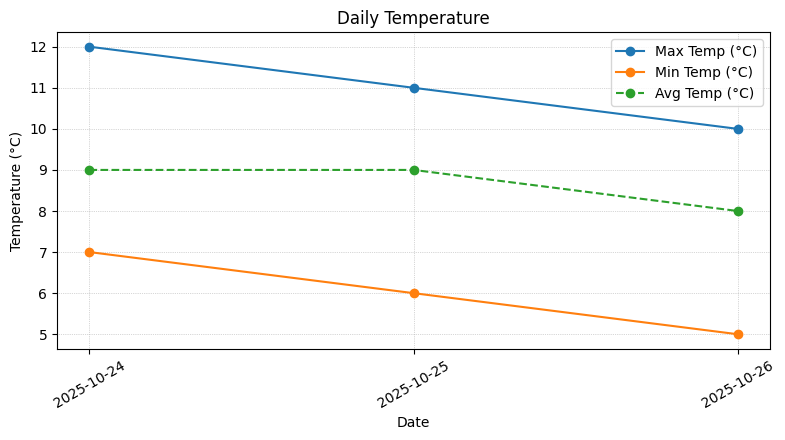

In [189]:
create_temperature_visualisation(get_weather_data("London", 3, "json"), "display")

/tmp/ipython-input-4294784418.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  return getattr(obj, attr)()


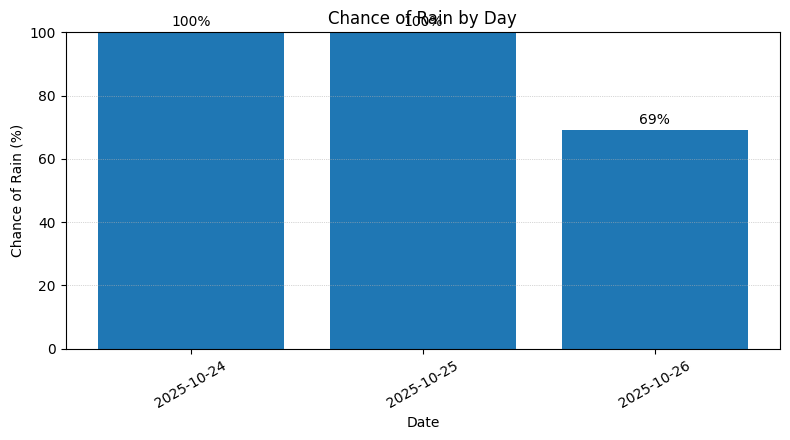

In [190]:
create_precipitation_visualisation(get_weather_data("Perth", 3, "json"), "display")